# **Analysis and Visualization of Co2 Emission data using Machine Learning Algorithms**

# **SUBMITTED BY:**
# PRIYANSHU KAPOOR - 20BCE1701
# Pragnya Prakash Panda - 20BCE1802
# MOHD. SAIFEE - 20BCE1980


## Loading the Required libraries

In [1]:
library(ggplot2)
library(dplyr)
library(RColorBrewer)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Loading and opening the dataset, The dataset df contains 8406 entries. Classifying  value fo co2 emmissions for each country from 
### 1990 to 2014.

In [2]:
df <- read.csv(file = 'greenhouse_gas_inventory_data_data.csv', sep = ',')
head(df)

,country_or_area,year,value,category
,<chr>,<int>,<dbl>,<chr>
1,Australia,2014,393126.9,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
2,Australia,2013,396913.9,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
3,Australia,2012,406462.8,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
4,Australia,2011,403705.5,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
5,Australia,2010,406201.0,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
6,Australia,2009,408448.5,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent


### Loading another dataset callled df1, This dataset contains Country with CO2 emmission and their population and life expectancy.
### We will use this dataset to determine whether high population contributes to high polution

In [3]:
df1<- read.csv(file = 'CO2Emission_LifeExp.csv', sep = ',')
head(df1)

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,Afghanistan,AFG,9900004,7.13,0.28,35383032,63.763
2,Albania,ALB,5208319,4.45,1.80,2886438,78.194
3,Algeria,DZA,156220560,0.17,3.85,40551392,76.298
4,Angola,AGO,30566933,3.13,1.06,28842489,59.925
5,Anguilla,AIA,30262,1.52,2.10,14429,81.441
6,Antigua and Barbuda,ATG,438763,1.51,4.64,94527,76.617


# Data Cleaning
### Cleaning the values under 'Category' into shorter values: Data Cleaning
### Before Data Cleaning: 

In [4]:
head(df$category)

[1] "carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent"
[2] "carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent"
[3] "carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent"
[4] "carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent"
[5] "carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent"
[6] "carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent"

### Checking for unique categories in df. 

In [5]:
unique(df['category'])

,category
,<chr>
1,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
1075,greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent
2024,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
3098,hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent
4073,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
5147,nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent
5395,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
6469,perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent
7300,sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent


 ### To shorten the values of the column we will be using transmute funtion. It will shorten the values like  carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent to'CO2' and so on...

In [6]:
#Data Cleaning: 
dataset <- df %>% transmute(category=recode(category, 
                                              carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent='CO2', 
                                              greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent='GHG-indirect-CO2',
                                              greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent='GHG',
                                              hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent='HFC',
                                              methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent='CH4',
                                              nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent='HF3',
                                              nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent='N2Os',
                                              perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent='PFCs',
                                              sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent='SF6',
                                              unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent='HFC-PFC-mix'))

# For second dataset

### Renaming the Column "country_or_area" to "country" and removing UN because it is not a country

In [7]:
dataset <- df%>% rename(country=country_or_area)%>%filter(country!='European Union')

In [8]:
str(df1)

'data.frame':	208 obs. of  7 variables:
 $ Country       : chr  "Afghanistan" "Albania" "Algeria" "Angola" ...
 $ Code          : chr  "AFG" "ALB" "DZA" "AGO" ...
 $ CO2Emissions  : num  9.90e+06 5.21e+06 1.56e+08 3.06e+07 3.03e+04 ...
 $ YearlyChange  : num  7.13 4.45 0.17 3.13 1.52 1.51 0.16 3.06 1.51 -0.98 ...
 $ Percapita     : num  0.28 1.8 3.85 1.06 2.1 4.64 4.61 1.57 2.74 17.1 ...
 $ Population    : int  35383032 2886438 40551392 28842489 14429 94527 43508460 2936143 104872 24262712 ...
 $ LifeExpectancy: num  63.8 78.2 76.3 59.9 81.4 ...


### To check if values should be dropped or not

In [9]:
nrowsdf1=nrow(df1)
nrowsdf1
ncompletedf1=sum(complete.cases(df1))
ncompletedf1
ncompletedf1/nrowsdf1

[1] 208

[1] 208

[1] 1

### Since the ratio of completed cases and number of rows is 1 we can interpret that there are no missing values in the data 

### The dataframe df1 is complete without any missing values therefore no more data cleaning is required. 
### Understanding Dataframe df:

In [10]:
summary(df)

 country_or_area         year          value           category        
 Length:8406        Min.   :1990   Min.   :      0   Length:8406       
 Class :character   1st Qu.:1996   1st Qu.:    298   Class :character  
 Mode  :character   Median :2002   Median :   7840   Mode  :character  
                    Mean   :2002   Mean   : 205547                     
                    3rd Qu.:2008   3rd Qu.:  65899                     
                    Max.   :2014   Max.   :7422208                     

In [11]:
max(df$value)

[1] 7422208

In [12]:
print(table(df$country, df$category))

                          
                           carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
  Australia                                                                                                                           25
  Austria                                                                                                                             25
  Belarus                                                                                                                             25
  Belgium                                                                                                                             25
  Bulgaria                                                                                                                            25
  Canada                                                                                                                              25
  Croatia     

In [13]:
subset(df,year==2014&value>40000)

,country_or_area,year,value,category
,<chr>,<int>,<dbl>,<chr>
1,Australia,2014,393126.95,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
26,Austria,2014,64262.56,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
51,Belarus,2014,60615.65,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
76,Belgium,2014,96325.41,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
101,Bulgaria,2014,45139.96,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
126,Canada,2014,574099.78,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
201,Czech Republic,2014,101159.12,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
276,European Union,2014,3463397.56,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
301,Finland,2014,47597.73,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent


# Implementing machine learning algorithms.
# 1.PCA
# 2.Linear Regression
# Lets divides the data sets into training dataset and test datasets.

In [14]:
set.seed(222)
df2 <- sample(2, nrow(df1),
              replace = TRUE,
              prob = c(0.8, 0.2))
training <- df1[df2==1,]
testing <- df1[df2==2,]

In [15]:
pc <- prcomp(training[,c(3:7)],
             center = TRUE,
            scale. = TRUE)
attributes(pc)

$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"

In [16]:
pc$scale

CO2Emissions   YearlyChange      Percapita     Population LifeExpectancy 
  9.005661e+08   3.383551e+00   5.973708e+00   1.154688e+08   7.837494e+00

In [17]:
print(pc)


Standard deviations (1, .., p=5):
[1] 1.4334048 1.2171014 0.9296629 0.7414265 0.2236704

Rotation (n x k) = (5 x 5):
                      PC1        PC2         PC3          PC4         PC5
CO2Emissions    0.6531522 -0.2547012 -0.04817701  0.009177344 -0.71141712
YearlyChange   -0.2370637 -0.3423694 -0.90396301  0.091471556 -0.03267714
Percapita       0.2751713  0.5885592 -0.22428754  0.723297908  0.06643847
Population      0.6183384 -0.3552340 -0.05564953 -0.027578620  0.69829005
LifeExpectancy  0.2431696  0.5876371 -0.35655025 -0.683833523  0.02819250


## Making a linear regression model

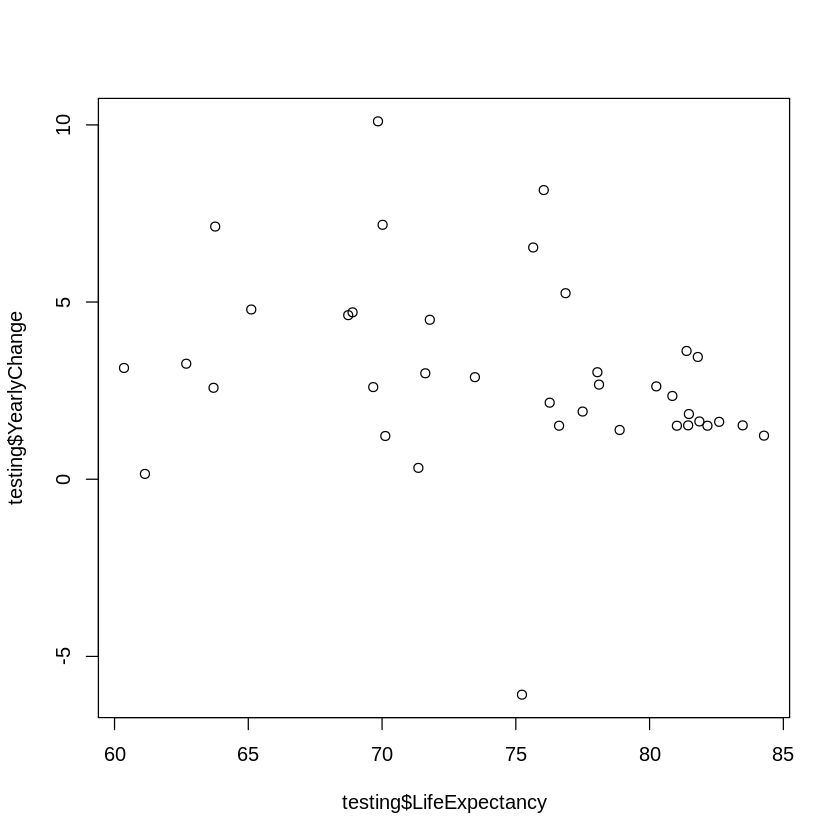

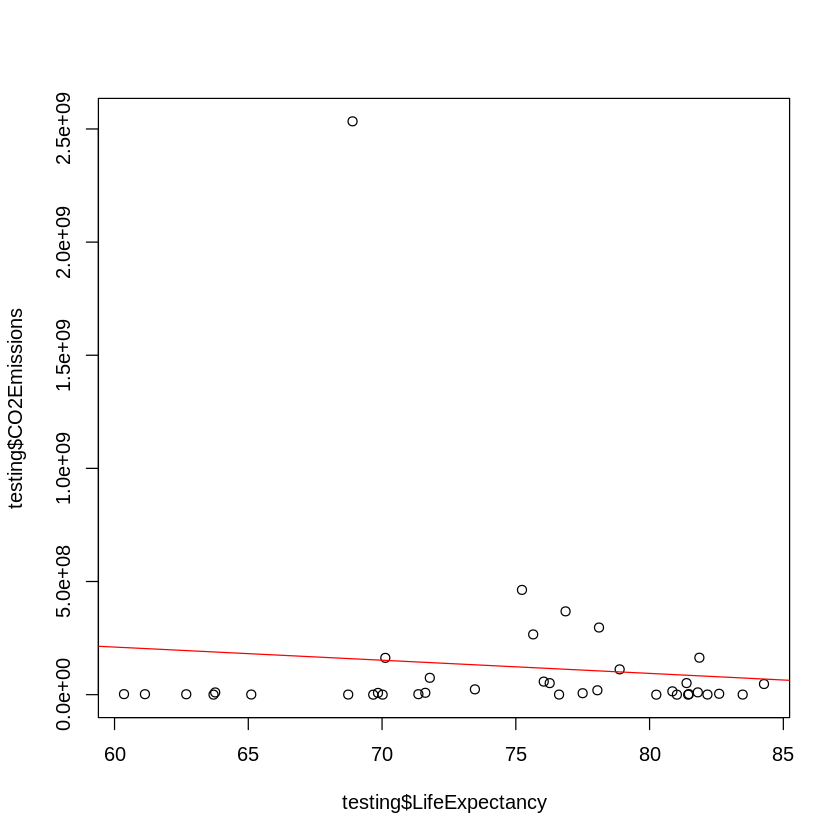


Call:
lm(formula = CO2Emissions ~ LifeExpectancy, data = testing)

Residuals:
       Min         1Q     Median         3Q        Max 
-205858668 -144336486  -84130496  -40766325 2375155020 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)    559523281  751493173   0.745    0.461
LifeExpectancy  -5820866   10034682  -0.580    0.565

Residual standard error: 420100000 on 36 degrees of freedom
Multiple R-squared:  0.00926,	Adjusted R-squared:  -0.01826 
F-statistic: 0.3365 on 1 and 36 DF,  p-value: 0.5655



Call:
lm(formula = CO2Emissions ~ Population, data = testing)

Residuals:
       Min         1Q     Median         3Q        Max 
-245397264  -21098887  -19751217    9561856  204331916 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.028e+07  1.336e+07   1.519    0.138    
Population  1.896e+00  6.076e-02  31.211   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 79690000 on 36 degrees of freedom
Multiple R-squared:  0.9644,	Adjusted R-squared:  0.9634 
F-statistic: 974.1 on 1 and 36 DF,  p-value: < 2.2e-16



Call:
lm(formula = CO2Emissions ~ LifeExpectancy, data = testing)

Coefficients:
   (Intercept)  LifeExpectancy  
     559523281        -5820866  



Call:
lm(formula = CO2Emissions ~ Population, data = testing)

Coefficients:
(Intercept)   Population  
  2.028e+07    1.896e+00  


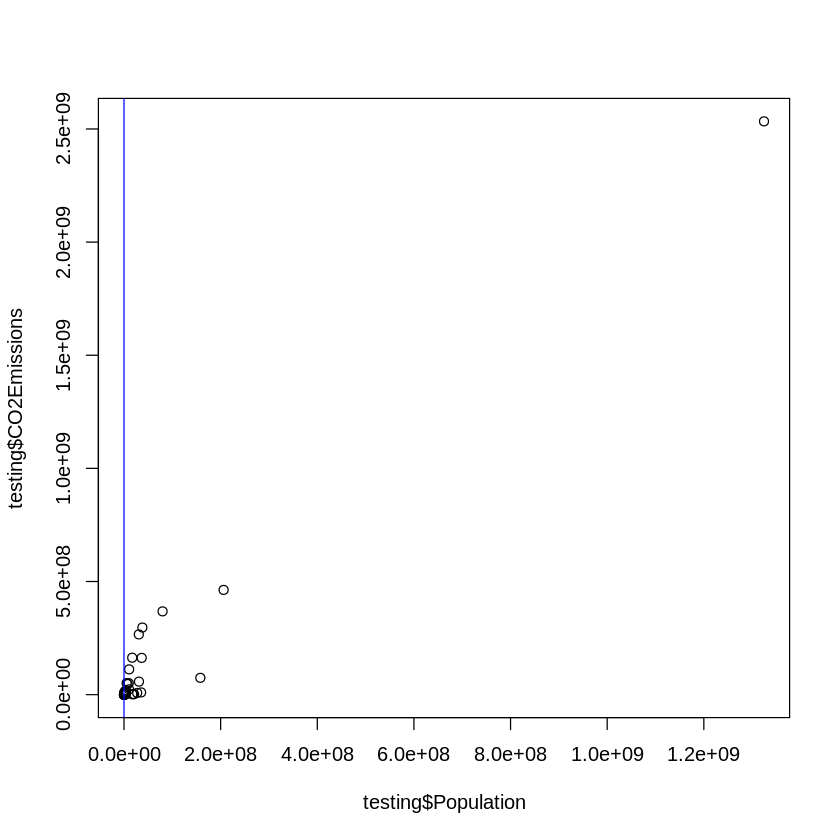

In [18]:
plot(testing$LifeExpectancy, testing$YearlyChange)
plot(testing$CO2Emissions~testing$LifeExpectancy)
emission.reg<-lm(CO2Emissions~LifeExpectancy, data=testing)
abline(emission.reg,col='red')
plot(testing$CO2Emissions~testing$Population)
population.reg<-lm(CO2Emissions~Population,data=testing)
abline(emission.reg,col='blue')
summary(emission.reg)
summary(population.reg)
emission.reg
population.reg

## Making a correlation matrix and Interpreting results through it.

### Installing package that we need for this visualization

In [19]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Attaching the package and making a correlational matrix. 

### In Correlation matrix -1 indicates a perfectly negative linear correlation between two variables.
### 0 indicates no linear correlation between two variables.
### 1 indicates a perfectly positive linear correlation between two variables.

corrplot 0.92 loaded



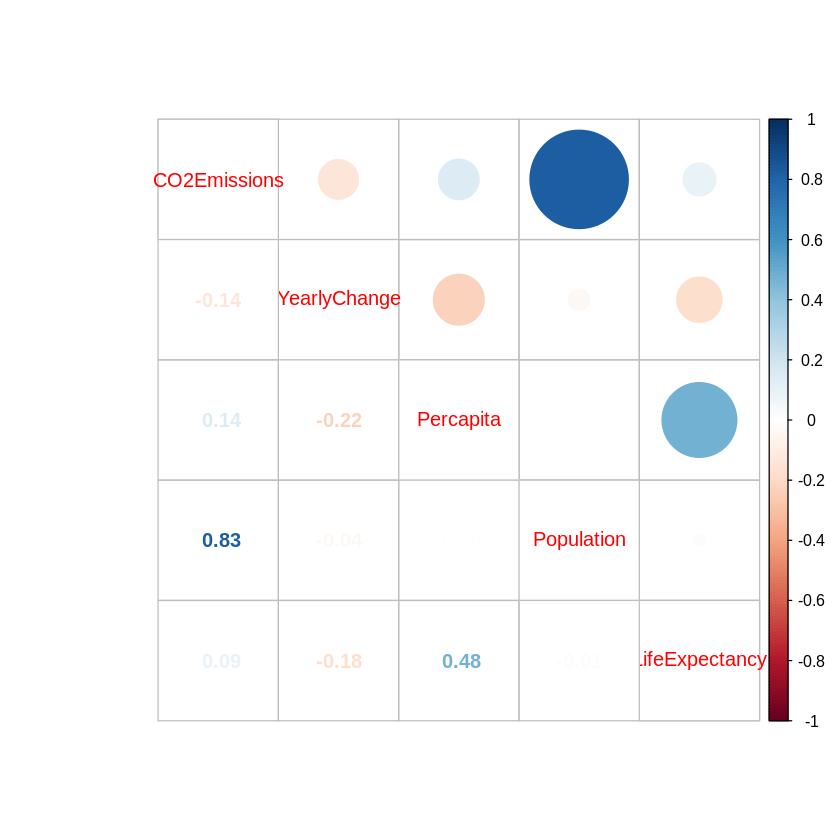

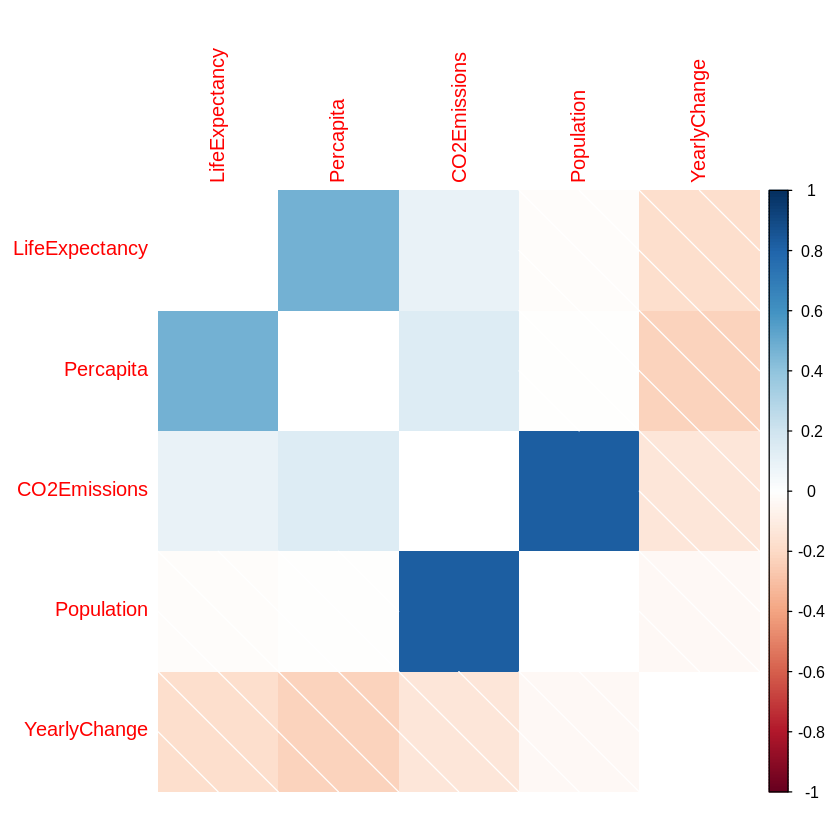

In [20]:
library(corrplot)
M <- cor(df1[3:7])
corrplot.mixed(M)
corrplot(M, method = 'shade', order = 'AOE', diag = FALSE)

### From the above graph we can see that their is perfectly negative realtionship with yearly change mostly and the componets having a negative relationship are Life Expectancy, PerCapita and Co2 emissions. Where as we can see some components have constant relationship i.e 0 here 0 indicates no linear correlation/constant realtionship between two variables. We can see that population and CO2 Emissions have highly positive realtionship from which we can interpret that When the population Increases the Co2 Emissions also increases

#Using the seriation package we will be attempting Bar-Joseph seration algorithm for fast optimal leaf ordering. That refines output from heirachichal clustering analysis.

In [22]:
install.packages("seriation")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘TSP’, ‘qap’, ‘gclus’, ‘ca’, ‘registry’




In [23]:
library(seriation)

In [24]:
# Remove the column `country` and `code` (column 1 and 2)
s<-df1[3:7]
set.seed(123)
# Reorder the objects randomly
s <- s[sample(seq_len(nrow(s))),]
head(s, 2)

,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
,<dbl>,<dbl>,<dbl>,<int>,<dbl>
159,8842,1.51,1.49,5934,80.654
207,4230584,3.67,0.26,16363458,62.464


In [25]:
# Compute dissimilarity matrix
dist_result <- dist(s)
# Seriate objects, reorder rows based on their similarity
object_order <- seriate(dist_result)
# Extract object orders
head(get_order(object_order), 15)

40 199  89 154  97  73  34  91 174  90 163  26 122  10 173 
142  85  75 129  51 171  45  14 116  13  71  21 117 176 143

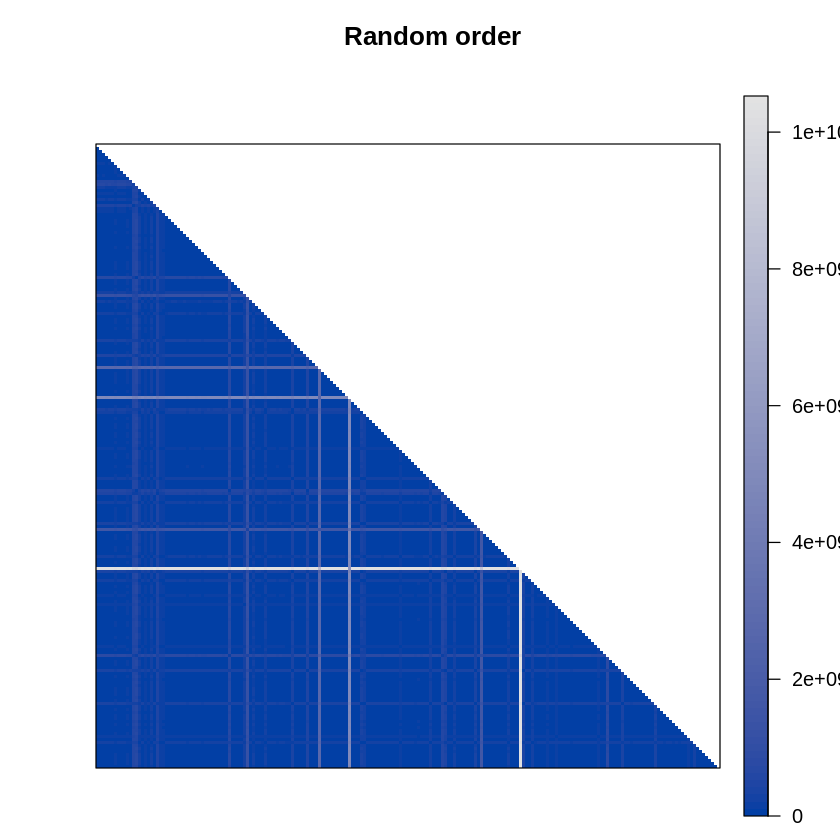

In [26]:

# Visualize the effect of seriation on dissimilarity matrix
pimage(dist_result, main = "Random order")

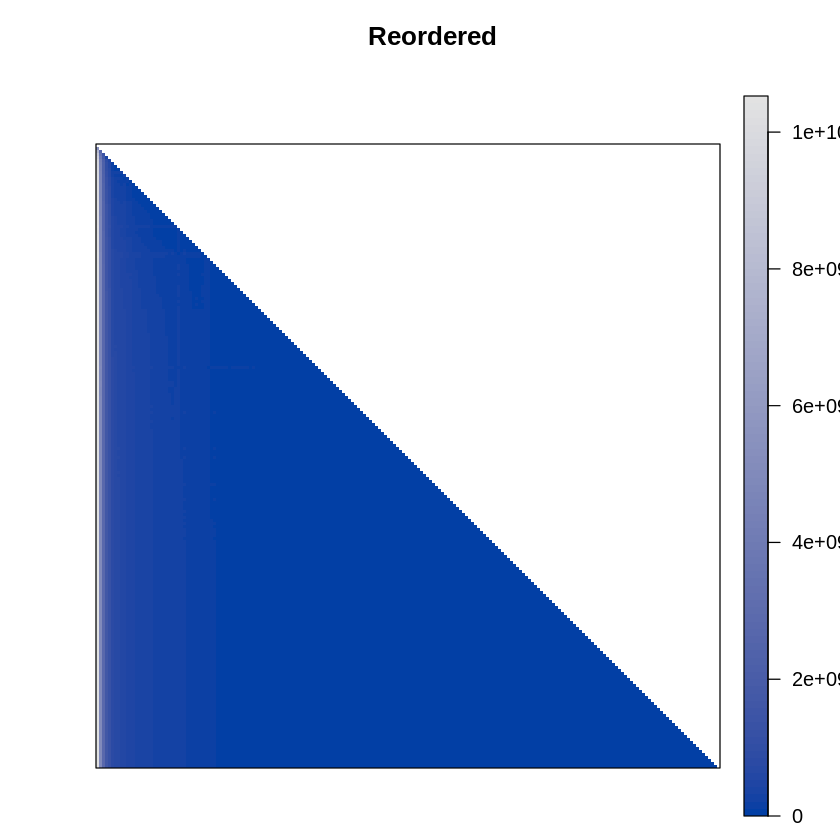

In [27]:

pimage(dist_result, order = object_order, main = "Reordered")

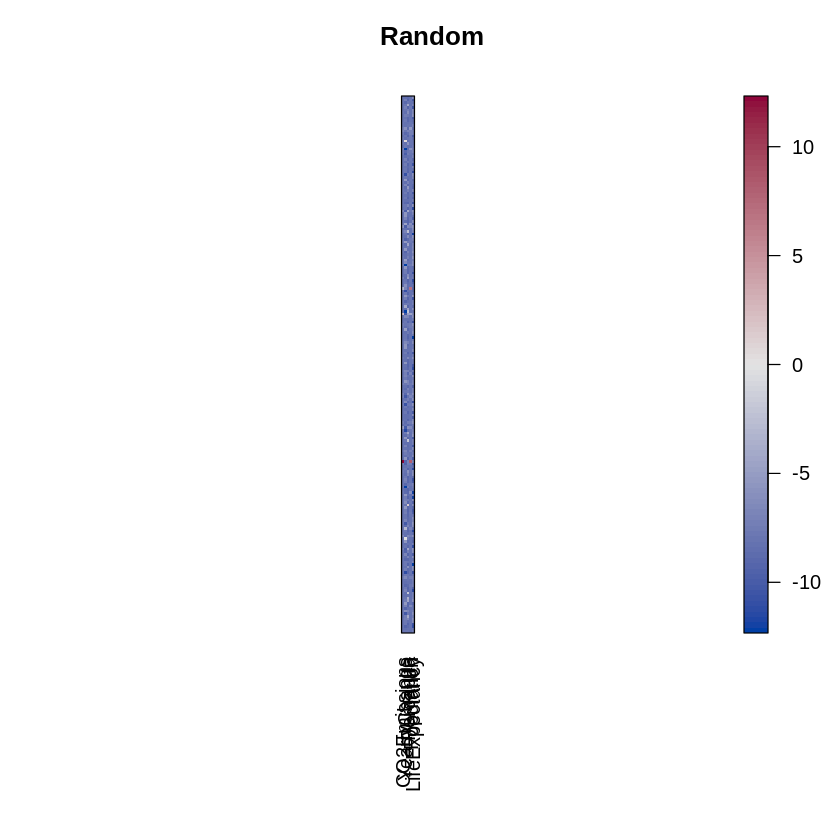

In [28]:

pimage(scale(s), main = "Random")

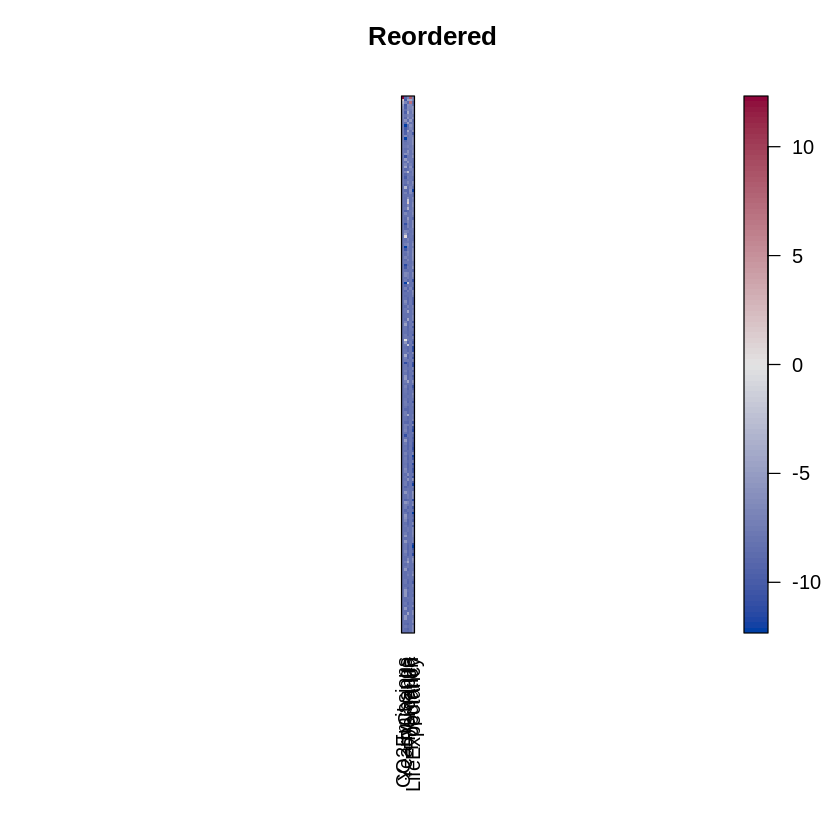

In [29]:

# Heatmap of the reordered data
pimage(scale(s), order = c(object_order, NA), main = "Reordered")

In [38]:
install.packages('gplots')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:

library(gplots)

     

In [34]:
# Standardize the data
df_scaled <- scale(s, center = FALSE)



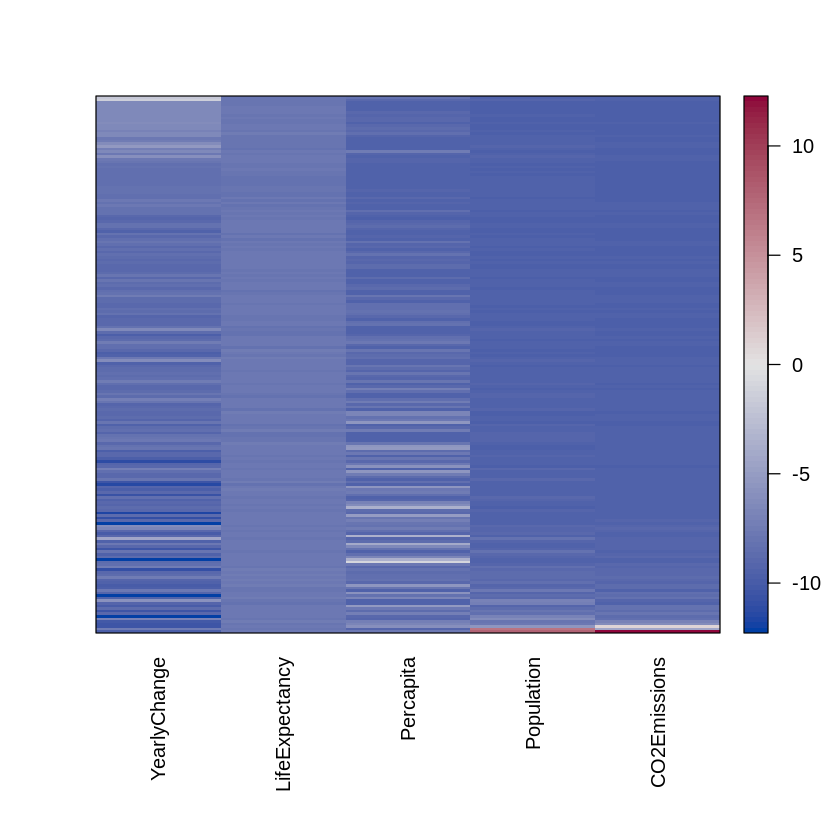

In [35]:

# Specify seriation method
# seriation on the dissimilarity matrices for rows and columns is performed
hmap(df_scaled, method = "MDS")

#Bertin’s permutation matrix

The idea is to reveal a more homogeneous structure in a data matrix by simultaneously rearranging rows and columns. The rearranged matrix is displayed and cases and variables can be grouped manually to gain a better understanding of the data.

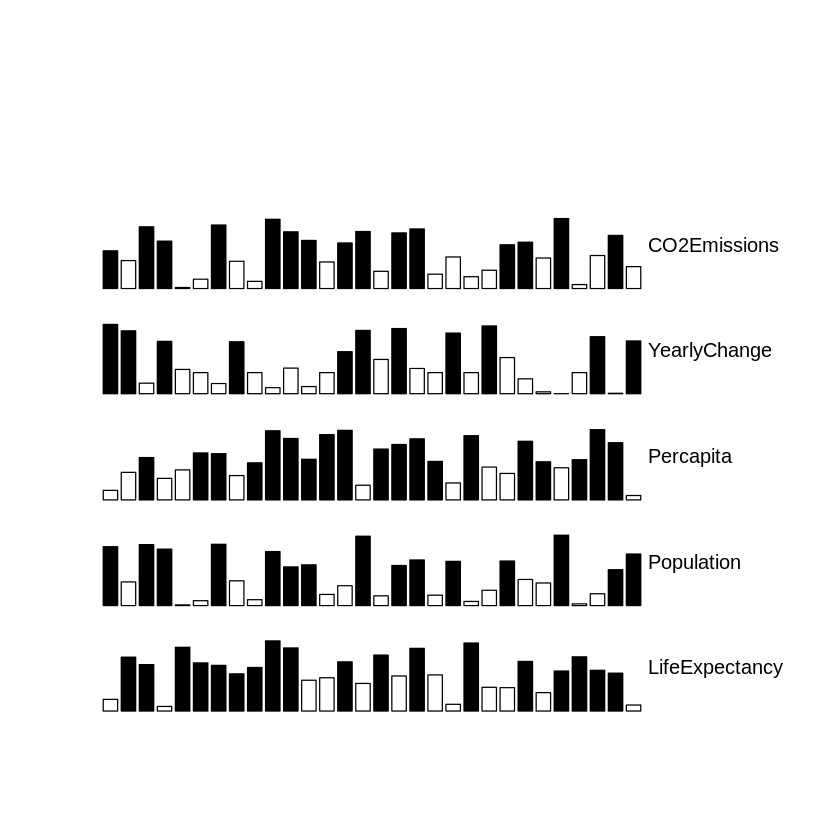

In [36]:

# Replace original values by their ranks
g <- head(apply(df1[3:7], 2, rank), 30)

# Perform seriation on row and columns
row_order <- seriate(dist(g, "minkowski", p = 1),  method ="TSP")
col_order <- seriate(dist(t(g), "minkowski", p = 1),  method ="TSP")
orders <- c(row_order, col_order)

# Visualization: matrix of bars 
# Original matrix
bertinplot(g)

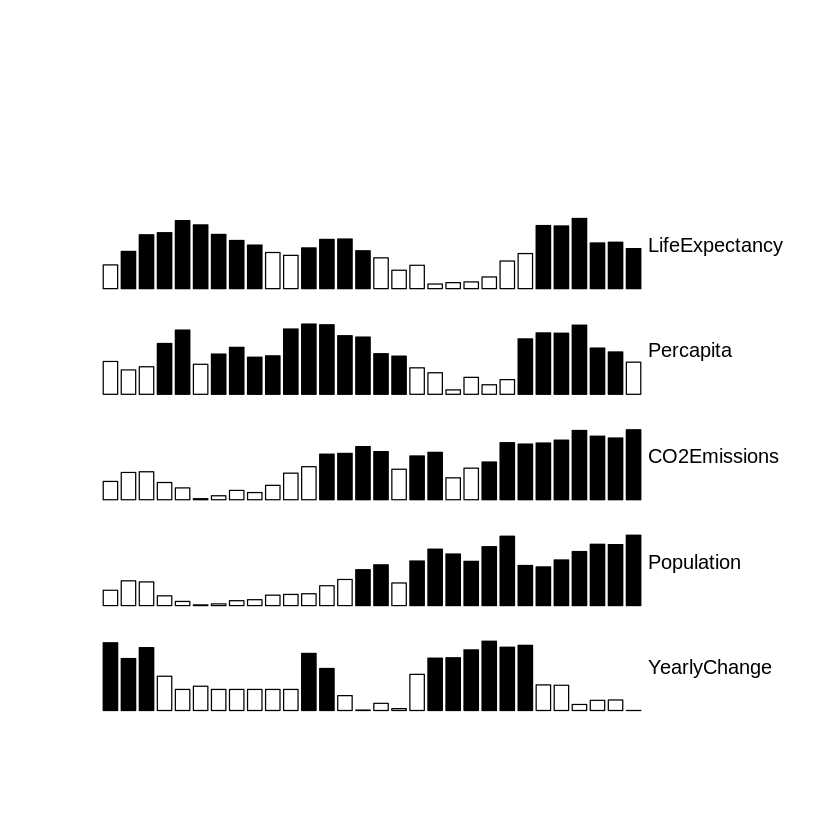

In [37]:

# Rearranged matrix
bertinplot(g, orders)